In [1]:
!pip install alpaca-py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as ft

from alpaca.data import StockHistoricalDataClient, TimeFrame
from alpaca.data.requests import StockQuotesRequest, StockBarsRequest

In [99]:
ALPACA_API_KEY_ID = 'API_KEY'
ALPACA_API_SECRET_KEY = 'SECRET_KEY'

# Instantiate a data client
data_client = StockHistoricalDataClient(ALPACA_API_KEY_ID, ALPACA_API_SECRET_KEY)

# Set the start time
start_time = pd.to_datetime("2023-02-26").tz_localize('America/New_York')# It's generally best to explicitly provide an end time but will default to 'now' if not
request_params = StockBarsRequest(
    symbol_or_symbols=['SOYB'],
    timeframe=TimeFrame.Day,
    start=start_time
    )

In [100]:
bars_df = data_client.get_stock_bars(request_params).df.tz_convert('America/New_York', level=1)

In [101]:
bars_df.index

MultiIndex([('SOYB', '2023-02-27 00:00:00-05:00'),
            ('SOYB', '2023-02-28 00:00:00-05:00'),
            ('SOYB', '2023-03-01 00:00:00-05:00'),
            ('SOYB', '2023-03-02 00:00:00-05:00'),
            ('SOYB', '2023-03-03 00:00:00-05:00'),
            ('SOYB', '2023-03-06 00:00:00-05:00'),
            ('SOYB', '2023-03-07 00:00:00-05:00'),
            ('SOYB', '2023-03-08 00:00:00-05:00'),
            ('SOYB', '2023-03-09 00:00:00-05:00'),
            ('SOYB', '2023-03-10 00:00:00-05:00'),
            ...
            ('SOYB', '2024-02-12 00:00:00-05:00'),
            ('SOYB', '2024-02-13 00:00:00-05:00'),
            ('SOYB', '2024-02-14 00:00:00-05:00'),
            ('SOYB', '2024-02-15 00:00:00-05:00'),
            ('SOYB', '2024-02-16 00:00:00-05:00'),
            ('SOYB', '2024-02-20 00:00:00-05:00'),
            ('SOYB', '2024-02-21 00:00:00-05:00'),
            ('SOYB', '2024-02-22 00:00:00-05:00'),
            ('SOYB', '2024-02-23 00:00:00-05:00'),
            ('S

In [102]:
import pandas as pd

# Assuming bars_df is your DataFrame
# Convert the index to datetime
bars_df.index = pd.to_datetime(bars_df.index.get_level_values(1))
bars_df.index = bars_df.index.date

# Now your index is converted to a datetime index
print(bars_df.index)

Index([2023-02-27, 2023-02-28, 2023-03-01, 2023-03-02, 2023-03-03, 2023-03-06,
       2023-03-07, 2023-03-08, 2023-03-09, 2023-03-10,
       ...
       2024-02-12, 2024-02-13, 2024-02-14, 2024-02-15, 2024-02-16, 2024-02-20,
       2024-02-21, 2024-02-22, 2024-02-23, 2024-02-26],
      dtype='object', length=251)


In [103]:
bars_df

,open,high,low,close,volume,trade_count,vwap
2023-02-27,28.26,28.2600,27.9900,28.0300,21054.0,235.0,28.048651
2023-02-28,27.87,27.8700,27.4400,27.5000,143104.0,683.0,27.534114
2023-03-01,27.56,27.8100,27.5600,27.7000,114477.0,400.0,27.700634
2023-03-02,27.50,28.0700,27.5000,27.9600,24130.0,196.0,27.945100
2023-03-03,28.00,28.2044,28.0000,28.1800,11492.0,155.0,28.141768
...,...,...,...,...,...,...,...
2024-02-20,24.77,24.8990,24.6450,24.7842,17988.0,212.0,24.808517
2024-02-21,24.58,24.5800,24.3601,24.4100,16501.0,199.0,24.460454
2024-02-22,24.43,24.4700,24.1300,24.2200,38349.0,265.0,24.261405
2024-02-23,24.14,24.1401,23.9400,24.0500,28601.0,298.0,24.031474


<Axes: >

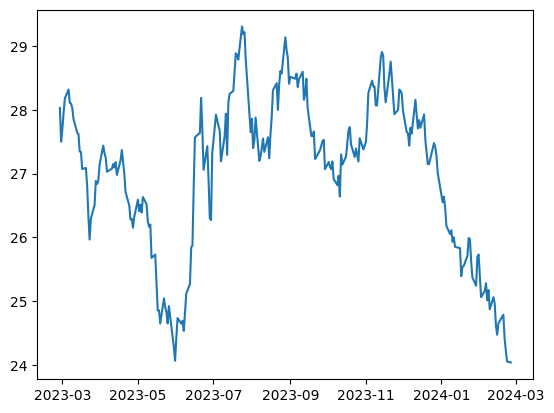

In [104]:
bars_df['close'].plot()

In [105]:
#making data frame of stock prices into 2-dim list
stock_data = bars_df.values.tolist()
print(stock_data)

[[28.26, 28.26, 27.99, 28.03, 21054.0, 235.0, 28.048651], [27.87, 27.87, 27.44, 27.5, 143104.0, 683.0, 27.534114], [27.56, 27.81, 27.56, 27.7, 114477.0, 400.0, 27.700634], [27.5, 28.07, 27.5, 27.96, 24130.0, 196.0, 27.9451], [28.0, 28.2044, 28.0, 28.18, 11492.0, 155.0, 28.141768], [27.95, 28.46, 27.95, 28.32, 10517.0, 177.0, 28.251501], [28.32, 28.32, 28.07, 28.11, 13777.0, 148.0, 28.121487], [28.02, 28.35, 28.02, 28.1, 15352.0, 159.0, 28.206552], [28.22, 28.26, 27.9, 28.0247, 13244.0, 168.0, 28.017925], [27.83, 27.92, 27.76, 27.857, 97439.0, 309.0, 27.866577], [27.8, 27.92, 27.591, 27.64, 48996.0, 324.0, 27.705456], [27.58, 27.63, 27.501, 27.62, 24450.0, 486.0, 27.59177], [27.405, 27.51, 27.33, 27.347, 42734.0, 324.0, 27.37323], [27.31, 27.39, 27.15, 27.34, 22040.0, 272.0, 27.283226], [27.34, 27.34, 27.0675, 27.0718, 23799.0, 183.0, 27.148131], [27.02, 27.1405, 26.8, 27.09, 21902.0, 208.0, 27.035473], [27.43, 27.43, 26.8, 26.81, 19168.0, 257.0, 26.922124], [26.67, 26.67, 26.3201, 26.3

# Detrending

## Check for the existence of a trend

In [ ]:
# import numpy as np
# import statsmodels.api as sm

# # Assuming bars_df is your DataFrame containing the data
# # Extract 'close' column
# X = bars_df['close']

# # Extract index as the dependent variable
# Y = bars_df.index

# # Add a constant to the independent variable (X) to fit an intercept
# X = sm.add_constant(X)

# # Fit the linear regression model
# model = sm.OLS(Y, X).fit()

# # Print the summary of the regression results
# print(model.summary())

# # Extract the p-value of the coefficient for the independent variable
# p_value = model.pvalues[1]  # Index 1 corresponds to the independent variable coefficient
# print("P-value:", p_value)

In [85]:
# #detrending the data for open and close prices
# dtrend_open, dtrend_close = [], []

# for i in range(len(stock_data) - 1):
#     dtrend_open.append(float(stock_data[i][0]) - float(stock_data[i + 1][0]))
#     dtrend_close.append(float(stock_data[i][3]) - float(stock_data[i + 1][3]))

In [ ]:
# print(dtrend_open)

FFT

In [106]:
dtrend_close = bars_df['close'].values.tolist()
print(dtrend_close)

[28.03, 27.5, 27.7, 27.96, 28.18, 28.32, 28.11, 28.1, 28.0247, 27.857, 27.64, 27.62, 27.347, 27.34, 27.0718, 27.09, 26.81, 26.33, 25.9645, 26.29, 26.5078, 26.8859, 26.8365, 26.885, 27.135, 27.4395, 27.32, 27.249, 27.03, 27.0779, 27.15, 27.095, 27.18, 26.98, 27.21, 27.37, 27.18, 27.0, 26.71, 26.5, 26.28, 26.29, 26.15, 26.32, 26.59, 26.41, 26.51, 26.39, 26.633, 26.517, 26.25, 26.165, 26.2, 25.675, 25.73, 25.2685, 24.8489, 24.855, 24.6475, 25.04, 24.9066, 24.8268, 24.6485, 24.92, 24.28, 24.0621, 24.429, 24.7324, 24.6442, 24.69, 24.53, 24.8101, 25.1136, 25.2704, 25.84, 25.8711, 26.77, 27.57, 27.64, 28.19, 27.6846, 27.06, 27.43, 26.9072, 26.3, 26.27, 27.3227, 27.9241, 27.754, 27.68, 27.19, 27.59, 27.94, 27.2945, 28.1169, 28.25, 28.3, 28.6, 28.89, 28.86, 28.79, 29.31, 29.19, 29.22, 28.8, 28.51, 27.65, 27.86, 27.4, 27.53, 27.88, 27.2, 27.272, 27.4033, 27.55, 27.34, 27.57, 27.24, 27.62, 27.89, 28.31, 28.42, 28.0, 28.4, 28.61, 28.57, 29.14, 28.94, 28.82, 28.41, 28.52, 28.49, 28.57, 28.36, 28.48

In [107]:

freq = ft.fftfreq(len(dtrend_close))
spec = np.abs(ft.fft(dtrend_close))

# Find indices of dominant frequencies
num_dom_freq = 5  # Adjust as needed
dominant_indices = np.argsort(spec)[::-1][:num_dom_freq]

In [108]:
# Extract dominant frequencies
dominant_freq = freq[dominant_indices]

print("Dominant frequencies:", dominant_freq)

Dominant frequencies: [ 0.          0.01195219 -0.01195219  0.00398406 -0.00398406]


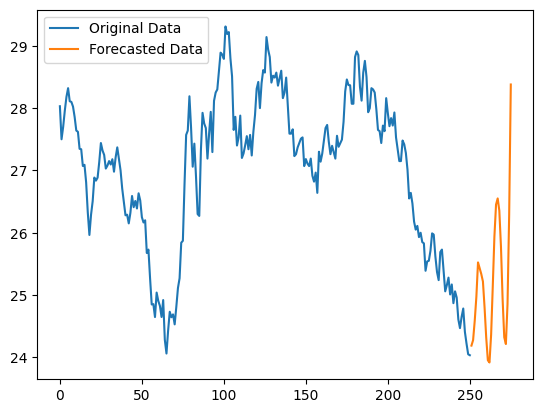

In [115]:
# Forecasting up to 45 periods in advance
forecast_periods = 25

# Extend the spectrum for forecasting
extended_spec = np.concatenate((spec, np.zeros(forecast_periods)))

# Inverse FFT to get the forecasted data
forecast = np.real(ft.ifft(extended_spec))

# Plotting the original and forecasted data
plt.plot(dtrend_close, label='Original Data')
plt.plot(range(len(dtrend_close), len(dtrend_close) + forecast_periods), forecast[-forecast_periods:], label='Forecasted Data')
plt.legend()
plt.show()